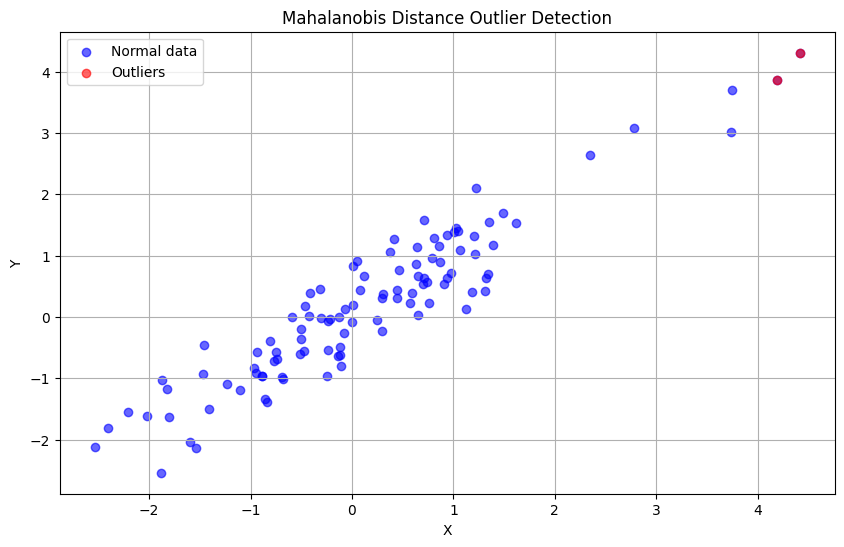

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.spatial.distance import mahalanobis

# 예제 데이터 생성
np.random.seed(0)
data = np.random.multivariate_normal(mean=[0, 0], cov=[[1, 0.9], [0.9, 1]], size=100)
df = pd.DataFrame(data, columns=['X', 'Y'])

# 이상치 추가
outliers_data = np.random.multivariate_normal(mean=[4, 4], cov=[[1, 0.9], [0.9, 1]], size=5)
outliers_df = pd.DataFrame(outliers_data, columns=['X', 'Y'])
df = pd.concat([df, outliers_df])

# 평균 벡터 계산
mean_vector = df.mean().values

# 공분산 행렬 계산
cov_matrix = np.cov(df.values.T)

# 공분산 행렬의 역행렬 계산
inv_cov_matrix = np.linalg.inv(cov_matrix)

# 마할라노비스 거리 계산 함수
def calculate_mahalanobis_distance(row, mean_vector, inv_cov_matrix):
    diff = row - mean_vector
    distance = np.sqrt(np.dot(np.dot(diff.T, inv_cov_matrix), diff))
    return distance

# 각 관측치에 대한 마할라노비스 거리 계산
df['Mahalanobis_Distance'] = df.apply(lambda row: calculate_mahalanobis_distance(row.values[:2], mean_vector, inv_cov_matrix), axis=1)

# 이상치 탐지 (예: 마할라노비스 거리가 특정 임계값을 초과하는 관측치)
threshold = 3
outliers = df[df['Mahalanobis_Distance'] > threshold]

# 시각화
plt.figure(figsize=(10, 6))
plt.scatter(df['X'], df['Y'], c='blue', label='Normal data', alpha=0.6)
plt.scatter(outliers['X'], outliers['Y'], c='red', label='Outliers', alpha=0.6)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Mahalanobis Distance Outlier Detection')
plt.legend()
plt.grid(True)
plt.show()

-----

In [ ]:
train_trans = pd.read_csv("/content/drive/MyDrive/Project/train_transaction.csv")
train_idf = pd.read_csv("/content/drive/MyDrive/Project/train_identity.csv")

test_trans = pd.read_csv("/content/drive/MyDrive/Project/test_transaction.csv")
test_idf = pd.read_csv("/content/drive/MyDrive/Project/test_identity.csv")

In [ ]:
train_trans.isna().sum().sort_values(ascending=False)

dist2            552913
D7               551623
D13              528588
D14              528353
D12              525823
                  ...  
C1                    0
C2                    0
C14                   0
isFraud               0
TransactionID         0
Length: 394, dtype: int64

In [ ]:
train_df2 = pd.read_csv("/content/drive/MyDrive/Project/train_df2.csv")
test_df2 = pd.read_csv("/content/drive/MyDrive/Project/test_df2.csv")

In [ ]:
train_trans

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
0,2987000,0,86400,68.50,W,13926,NaN,150.0,discover,142.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2987001,0,86401,29.00,W,2755,404.0,150.0,mastercard,102.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2987002,0,86469,59.00,W,4663,490.0,150.0,visa,166.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2987003,0,86499,50.00,W,18132,567.0,150.0,mastercard,117.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2987004,0,86506,50.00,H,4497,514.0,150.0,mastercard,102.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
590535,3577535,0,15811047,49.00,W,6550,NaN,150.0,visa,226.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
590536,3577536,0,15811049,39.50,W,10444,225.0,150.0,mastercard,224.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
590537,3577537,0,15811079,30.95,W,12037,595.0,150.0,mastercard,224.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
590538,3577538,0,15811088,117.00,W,7826,481.0,150.0,mastercard,224.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Data Merge
train_df = pd.merge(train_trans,train_idf,how='left',on='TransactionID')
test_df = pd.merge(test_trans,test_idf,how='left',on='TransactionID')
train_df

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
0,2987000,0,86400,68.50,W,13926,NaN,150.0,discover,142.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2987001,0,86401,29.00,W,2755,404.0,150.0,mastercard,102.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2987002,0,86469,59.00,W,4663,490.0,150.0,visa,166.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2987003,0,86499,50.00,W,18132,567.0,150.0,mastercard,117.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2987004,0,86506,50.00,H,4497,514.0,150.0,mastercard,102.0,...,samsung browser 6.2,32.0,2220x1080,match_status:2,T,F,T,T,mobile,SAMSUNG SM-G892A Build/NRD90M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
590535,3577535,0,15811047,49.00,W,6550,NaN,150.0,visa,226.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
590536,3577536,0,15811049,39.50,W,10444,225.0,150.0,mastercard,224.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
590537,3577537,0,15811079,30.95,W,12037,595.0,150.0,mastercard,224.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
590538,3577538,0,15811088,117.00,W,7826,481.0,150.0,mastercard,224.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# 수치형 변수들
numeric_cols = ['TransactionID', 'TransactionDT', 'TransactionAmt', 'card1', 'card2', 'addr1', 'addr2', 'dist1', 'dist2']
numeric_cols += [f'C{i}' for i in range(1, 15)]
numeric_cols += [f'D{i}' for i in range(1, 16)]
numeric_cols += [f'V{i}' for i in range(1, 340)]

# 수치형 데이터만 추출합니다.
numeric_data = train_df[numeric_cols]
numeric_data

,TransactionID,TransactionDT,TransactionAmt,card1,card2,addr1,addr2,dist1,dist2,C1,...,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
0,2987000,86400,68.50,13926,NaN,315.0,87.0,19.0,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2987001,86401,29.00,2755,404.0,325.0,87.0,NaN,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2987002,86469,59.00,4663,490.0,330.0,87.0,287.0,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2987003,86499,50.00,18132,567.0,476.0,87.0,NaN,NaN,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2987004,86506,50.00,4497,514.0,420.0,87.0,NaN,NaN,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
590535,3577535,15811047,49.00,6550,NaN,272.0,87.0,48.0,NaN,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
590536,3577536,15811049,39.50,10444,225.0,204.0,87.0,NaN,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
590537,3577537,15811079,30.95,12037,595.0,231.0,87.0,NaN,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
590538,3577538,15811088,117.00,7826,481.0,387.0,87.0,3.0,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


```
수치형 변수:
'TransactionDT', 'TransactionAmt', 'card1', 'card2', 'addr1', 'addr2', 'dist1', 'dist2'
'C1' ~ 'C14', 'D1' ~ 'D15'
```

In [ ]:
import pandas as pd
import numpy as np
from sklearn.covariance import EllipticEnvelope
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning)

# 사용할 컬럼 선택
columns = ['D1', 'D2']
X = train_df[columns]

# 결측치를 각 열의 평균으로 대체
X.fillna(X.mean(), inplace=True)

# ▶ EllipticEnvelope 을 이용하여 outlier를 검출하기 위한 객체를 생성합니다.
# ▶ The amount of contamination of the data set, i.e. the proportion of outliers in the data set
outlier_detector = EllipticEnvelope(contamination=0.1)

# ▶ EllipticEnvelope 객체를 생성한 데이터 학습
outlier_detector.fit(X)

# ▶ outlier를 검출
# ▶ +1 이면 boundary 안에 들어온 값으로 정상 데이터
# ▶ -1 이면 outlier로 간주.
pred = outlier_detector.predict(X)
pred

<ipython-input-79-ee9b6ef5bc7f>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.fillna(X.mean(), inplace=True)


array([1, 1, 1, ..., 1, 1, 1])

In [ ]:
# ▶ Raw data + Pred data
df = pd.DataFrame(X, columns=['D1', 'D2'])
df['outlier'] = pred
df.head(5)

,D1,D2,outlier
0,14.0,169.563231,1
1,0.0,169.563231,1
2,0.0,169.563231,1
3,112.0,112.000000,1
4,0.0,169.563231,1


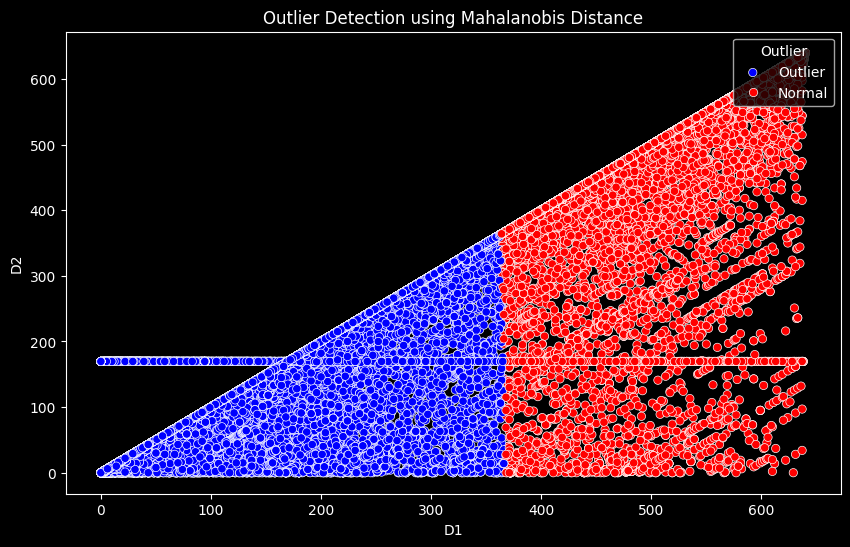

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use(['dark_background'])

# 팔레트 수정
palette = {1: 'blue', -1: 'red'}

plt.figure(figsize=(10, 6))
sns.scatterplot(x='D1', y='D2', hue='outlier', data=df, palette=palette)

plt.title('Outlier Detection using Mahalanobis Distance')
plt.xlabel('D1')
plt.ylabel('D2')
plt.legend(title='Outlier', loc='upper right', labels=['Outlier', 'Normal'])
plt.show()

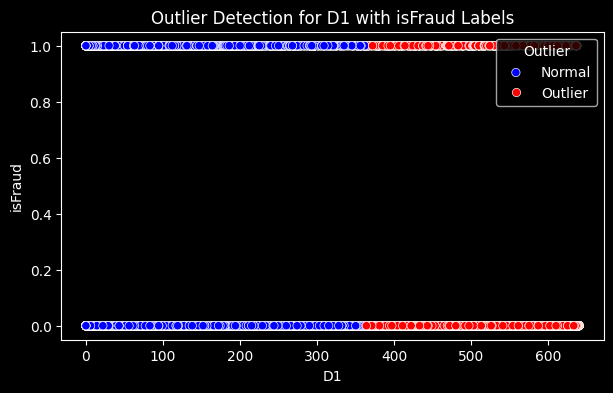

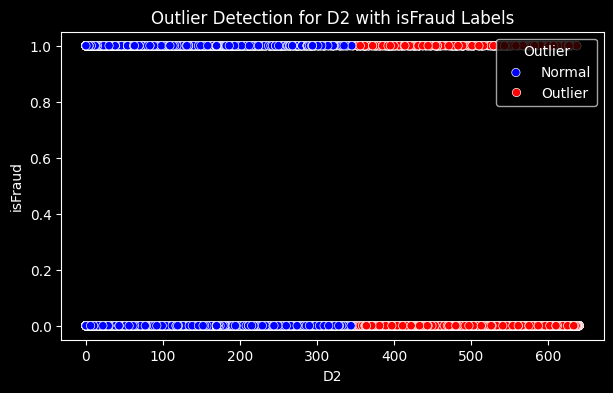

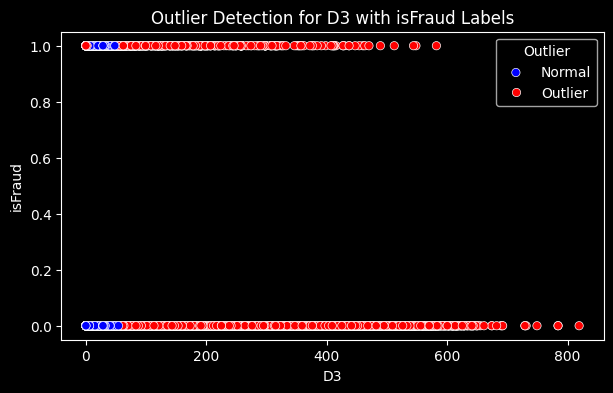

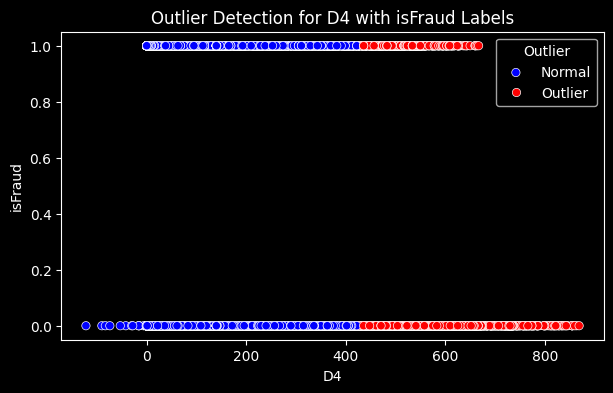

ValueError: The covariance matrix of the support data is equal to 0, try to increase support_fraction

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.covariance import EllipticEnvelope

# 시각화를 위한 스타일 설정
plt.style.use(['dark_background'])

# 사용할 컬럼 선택
fraud_col = 'isFraud'
columns = [f'D{i}' for i in range(1, 16)]

# 반복문을 통해 각 D 컬럼을 isFraud와 함께 시각화
for col in columns:
    # D 컬럼과 isFraud 컬럼 선택
    X = train_df[[col, fraud_col]].copy()

    # 결측치를 평균값으로 대체
    X.fillna(X.mean(), inplace=True)

    # EllipticEnvelope 을 이용하여 outlier를 검출하기 위한 객체를 생성합니다.
    outlier_detector = EllipticEnvelope(contamination=0.1, support_fraction=0.9)

    # EllipticEnvelope 객체를 생성한 데이터 학습
    outlier_detector.fit(X)

    # outlier를 검출
    pred = outlier_detector.predict(X)

    # 결과 데이터프레임 생성
    df = X.copy()
    df['outlier'] = pred

    # 시각화
    plt.figure(figsize=(7, 4))
    sns.scatterplot(x=col, y=fraud_col, hue='outlier', data=df, palette={1: 'blue', -1: 'red'})
    plt.title(f'Outlier Detection for {col} with isFraud Labels')
    plt.xlabel(col)
    plt.ylabel(fraud_col)
    plt.legend(title='Outlier', loc='upper right', labels=['Normal', 'Outlier'])
    plt.show()

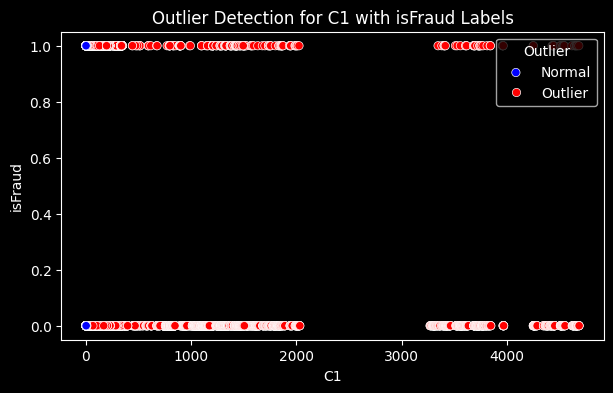

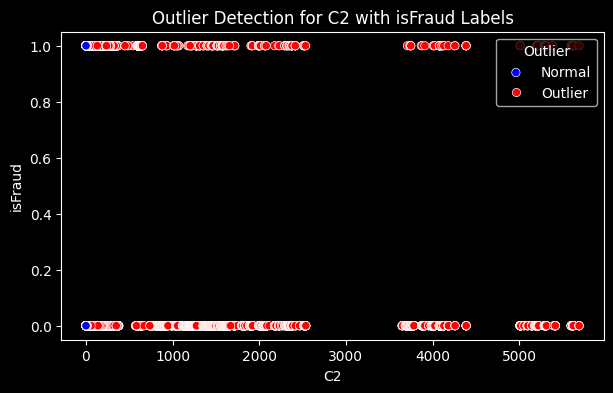

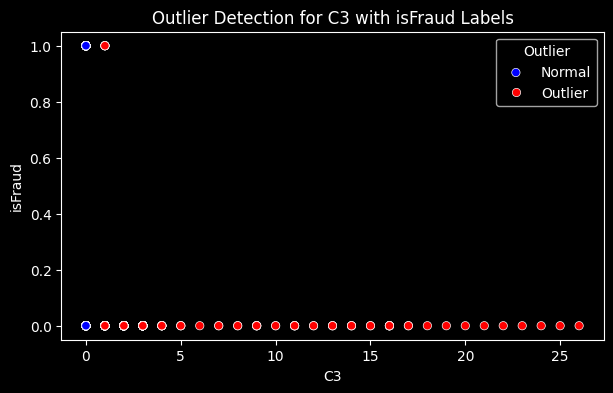

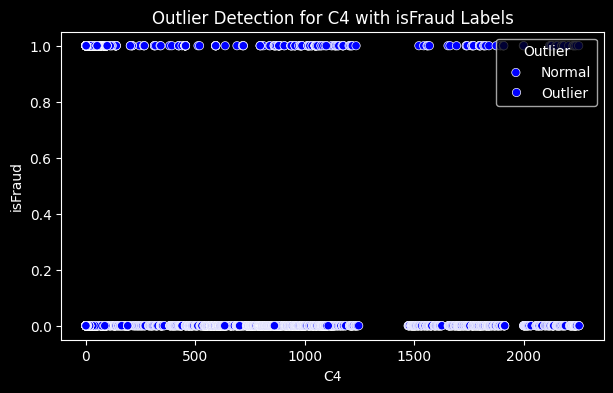

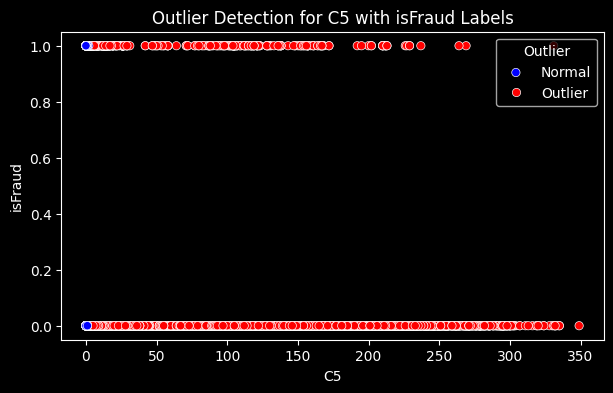

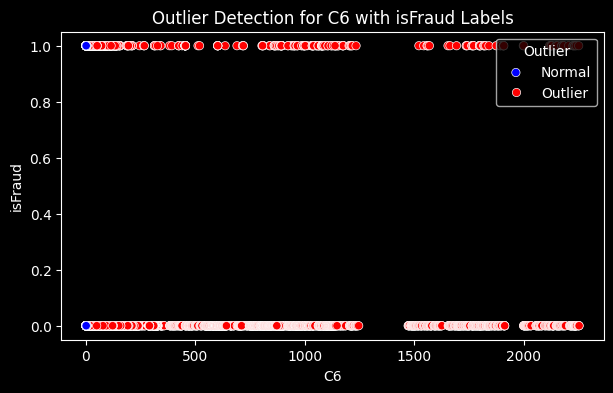

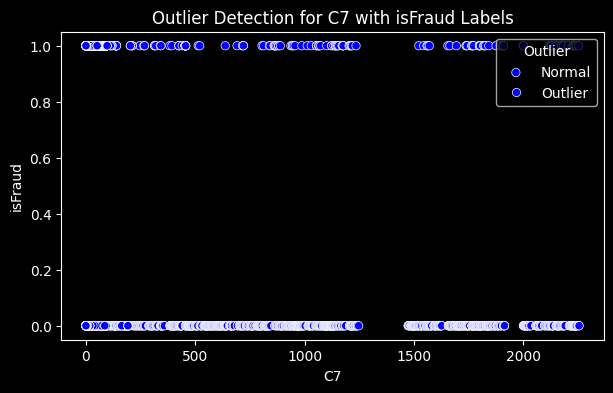

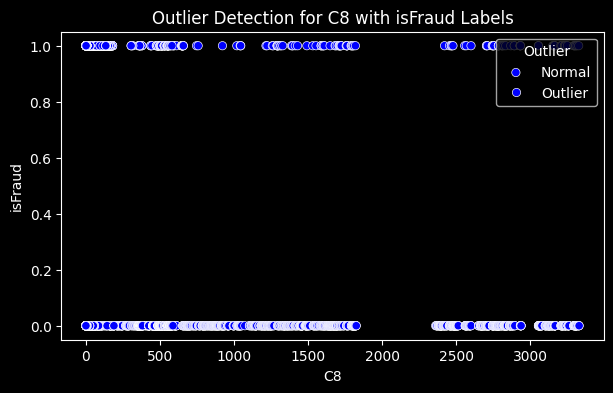

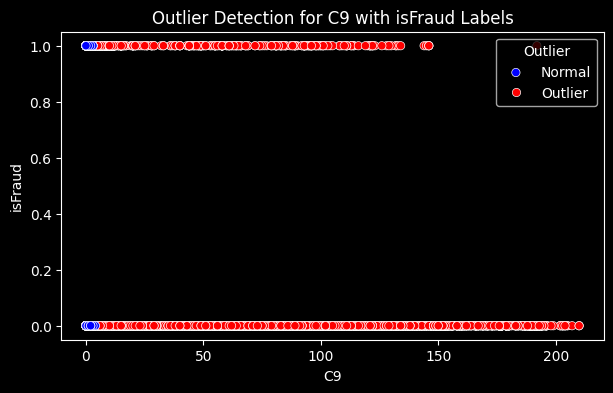

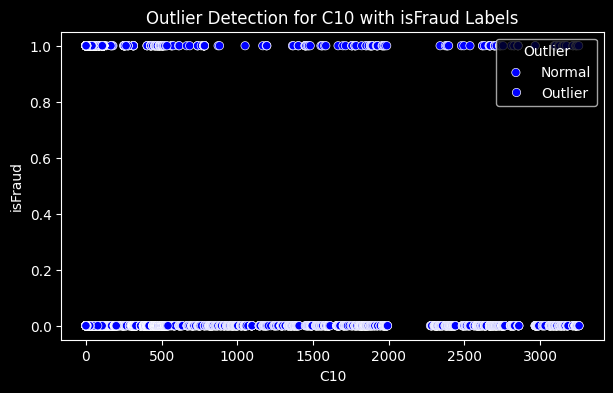

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.covariance import EllipticEnvelope
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning)

# 시각화를 위한 스타일 설정
plt.style.use(['dark_background'])

# 사용할 컬럼 선택
fraud_col = 'isFraud'
columns = [f'C{i}' for i in range(1, 11)]

# 반복문을 통해 각 C 컬럼을 isFraud와 함께 시각화
for col in columns:
    # C 컬럼과 isFraud 컬럼 선택
    X = train_df[[col, fraud_col]].copy()

    # 결측치를 평균값으로 대체
    X.fillna(X.mean(), inplace=True)

    # EllipticEnvelope 을 이용하여 outlier를 검출하기 위한 객체를 생성합니다.
    outlier_detector = EllipticEnvelope(contamination=0.1, support_fraction=0.9)

    # EllipticEnvelope 객체를 생성한 데이터 학습
    outlier_detector.fit(X)

    # outlier를 검출
    pred = outlier_detector.predict(X)

    # 결과 데이터프레임 생성
    df = X.copy()
    df['outlier'] = pred

    # 시각화
    plt.figure(figsize=(7, 4))
    sns.scatterplot(x=col, y=fraud_col, hue='outlier', data=df, palette={1: 'blue', -1: 'red'})
    plt.title(f'Outlier Detection for {col} with isFraud Labels')
    plt.xlabel(col)
    plt.ylabel(fraud_col)
    plt.legend(title='Outlier', loc='upper right', labels=['Normal', 'Outlier'])
    plt.show()

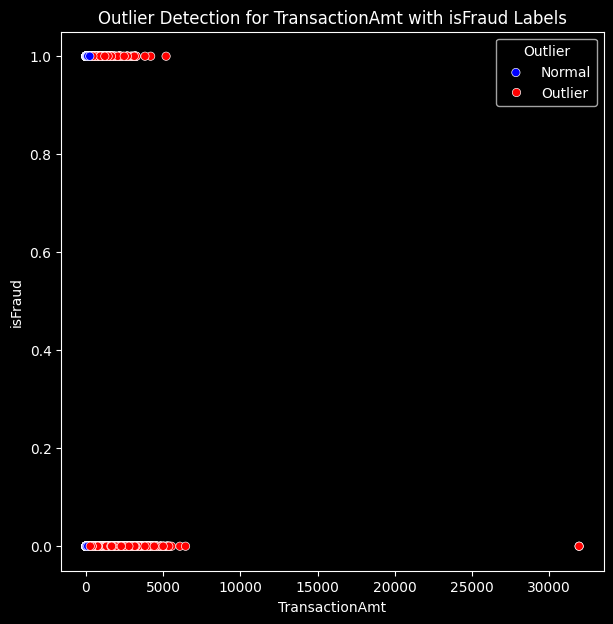

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.covariance import EllipticEnvelope
import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning)

# 사용할 컬럼 선택
fraud_col = 'isFraud'
col = 'TransactionAmt'

# TransactionAmt과 isFraud 컬럼 선택
X = train_df[[col, fraud_col]].copy()

# 결측치를 평균값으로 대체
X.fillna(X.mean(), inplace=True)

# EllipticEnvelope 을 이용하여 outlier를 검출하기 위한 객체를 생성합니다.
outlier_detector = EllipticEnvelope(contamination=0.1, support_fraction=0.9)

# EllipticEnvelope 객체를 생성한 데이터 학습
outlier_detector.fit(X)

# outlier를 검출
pred = outlier_detector.predict(X)

# 결과 데이터프레임 생성
df = X.copy()
df['outlier'] = pred

# 시각화
plt.figure(figsize=(7, 7))
sns.scatterplot(x=col, y=fraud_col, hue='outlier', data=df, palette={1: 'blue', -1: 'red'})
plt.title(f'Outlier Detection for {col} with isFraud Labels')
plt.xlabel(col)
plt.ylabel(fraud_col)
plt.legend(title='Outlier', loc='upper right', labels=['Normal', 'Outlier'])
plt.show()

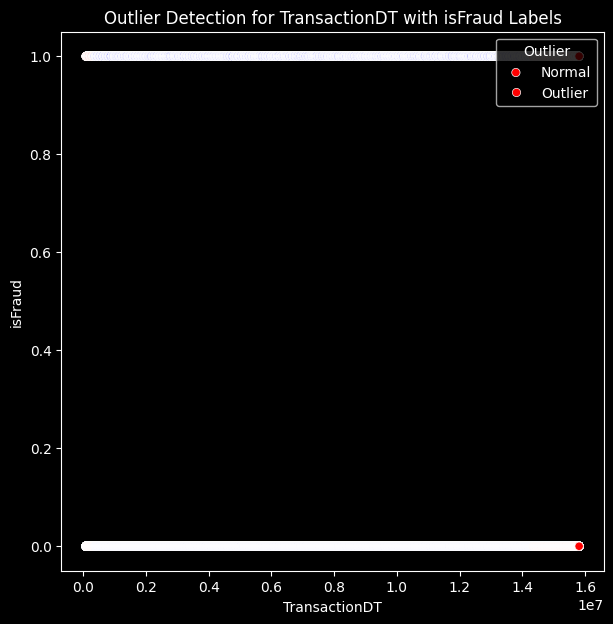

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.covariance import EllipticEnvelope
import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning)

# 사용할 컬럼 선택
fraud_col = 'isFraud'
col = 'TransactionDT'

# D7과 isFraud 컬럼 선택
X = train_df[[col, fraud_col]].copy()

# 결측치를 평균값으로 대체
X.fillna(X.mean(), inplace=True)

# EllipticEnvelope 을 이용하여 outlier를 검출하기 위한 객체를 생성합니다.
outlier_detector = EllipticEnvelope(contamination=0.1, support_fraction=0.9)

# EllipticEnvelope 객체를 생성한 데이터 학습
outlier_detector.fit(X)

# outlier를 검출
pred = outlier_detector.predict(X)

# 결과 데이터프레임 생성
df = X.copy()
df['outlier'] = pred

# 시각화
plt.figure(figsize=(7, 7))
sns.scatterplot(x=col, y=fraud_col, hue='outlier', data=df, palette={1: 'blue', -1: 'red'})
plt.title(f'Outlier Detection for {col} with isFraud Labels')
plt.xlabel(col)
plt.ylabel(fraud_col)
plt.legend(title='Outlier', loc='upper right', labels=['Normal', 'Outlier'])
plt.show()